In [15]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import numpy as np

from weavingspace import TileUnit
from weavingspace import WeaveUnit

from weavingspace import Tiling

In [16]:
anthromes = gpd.read_file("NACIS-2022/anthromes-clip.gpkg", driver="GPKG")

In [17]:
anthromes.sindex
anthromes.has_sindex

True

In [18]:
anthromes.shape

(765, 5)

In [21]:
# unit = TileUnit(# tiling_type = "hex-colouring", 
#                 #  Note these alternatives:
#                 #  tiling_type = "hex-dissection", n = 3, 
#                 tiling_type = "hex-dissection", dissection_offset = 0, n = 3,
#                 crs = anthromes.crs, 
#                 spacing = 100000).transform_rotate(15).inset_tile(1250) \
#                   .inset_elements(1250)

unit = WeaveUnit(#weave_type = "twill", spacing = 35_000,
                 #strands = "a|b", aspect = 0.8,
                 weave_type = "cube", spacing = 35_000,
                 strands = "aa-|b-b|-cc", aspect = 1., # this is the open hex
                 # strands = "a|b|c", aspect = .85,
                 crs = anthromes.crs).transform_rotate(15).inset_elements(900)

<AxesSubplot:>

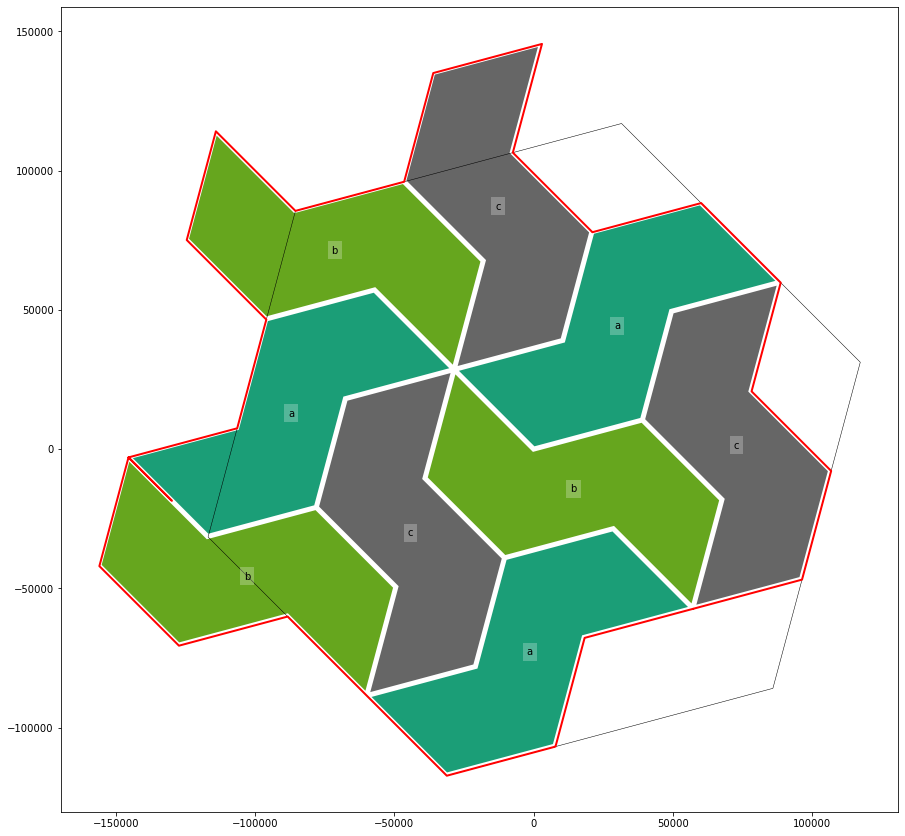

In [22]:
unit.plot(r = 0, show_ids = True, show_reg_tile = True, show_tile = True,
          figsize = (15, 15))

In [23]:
tiling = Tiling(unit, anthromes, id_var = "dissolved_id")

In [24]:
map = tiling.get_tiled_map(#prioritise_tiles = False,
                           #ragged_edges = False, 
                           debug = True)

STEP 1: prep data (rotation if requested): 0.000
STEP A2: overlay zones with tiling: 16.119
STEP A3: calculate areas: 0.021
STEP A4: drop columns prior to join: 0.002
STEP A5: build lookup for join: 0.221
STEP A6: perform lookup join: 0.005
STEP A7/B3: dissolve tiles within zones: 0.000


In [25]:
map.to_file('NACIS-2022/anthromes-tiled-cube-weave-spacing-35k-aspect-85-inset900-s_shapes.gpkg')

In [ ]:
this will cause an error

In [ ]:
map.variables = dict(zip(list("abc"),
                        ("1800AD", "1900AD", "2017AD")))
map.colourmaps = dict(zip(map.variables.values(), 
                         ("Spectral", "Spectral", "Spectral")))

fig = map.render(legend = False, scheme = "quantiles") # quantiles for interest

In [ ]:
map.dpi = 600  # don't ask me what makes sense for DPI
map.figsize = (10, 7)

fig = map.render(legend = False, scheme = "quantiles")

In [ ]:
fig.savefig("NACIS-2022/output/another-map.svg")